# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Q1. What are the key insights you can derive from the dataset in terms of its structure, size, and basic statistics? Create a summary report ( hint: use pandas .describe() function ). Also share your insights you learned by this report.**

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv'
df = pd.read_csv(url)

# Inspect the structure and size of the dataset
print("Dataset Structure:")
print(df.shape)
print("\n")

# View the first few rows of the dataset
print("First 10 rows:")
print(df.head(10))
print("\n")

# Generate a summary report of the dataset
print("Summary Report:")
print(df.describe())


Dataset Structure:
(365, 13)


First 10 rows:
        date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0   2014-7-1                81               70               91   
1   2014-7-2                85               74               95   
2   2014-7-3                82               71               93   
3   2014-7-4                75               64               86   
4   2014-7-5                72               60               84   
5   2014-7-6                74               61               87   
6   2014-7-7                79               67               91   
7   2014-7-8                83               72               94   
8   2014-7-9                80               71               89   
9  2014-7-10                78               71               85   

   average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                67                89               56              104   
1                68                89               56 

**The summary report findings show us that:**
1.  The dataset contains **365** entries, indicating that it represents weather data for a year.
2.  The dataset has **7** columns, including **actual_mean_temp, actual_min_temp, actual_max_temp, average_min_temp, average_max_temp, record_min_temp, and record_max_temp.**
3.  The **mean, standard deviation, minimum value and quantiles (25%, 50% and 75%)** of each column have been displayed.





**Q2. What will be the best way to Visualize the average_min_temprature over year 2014?**

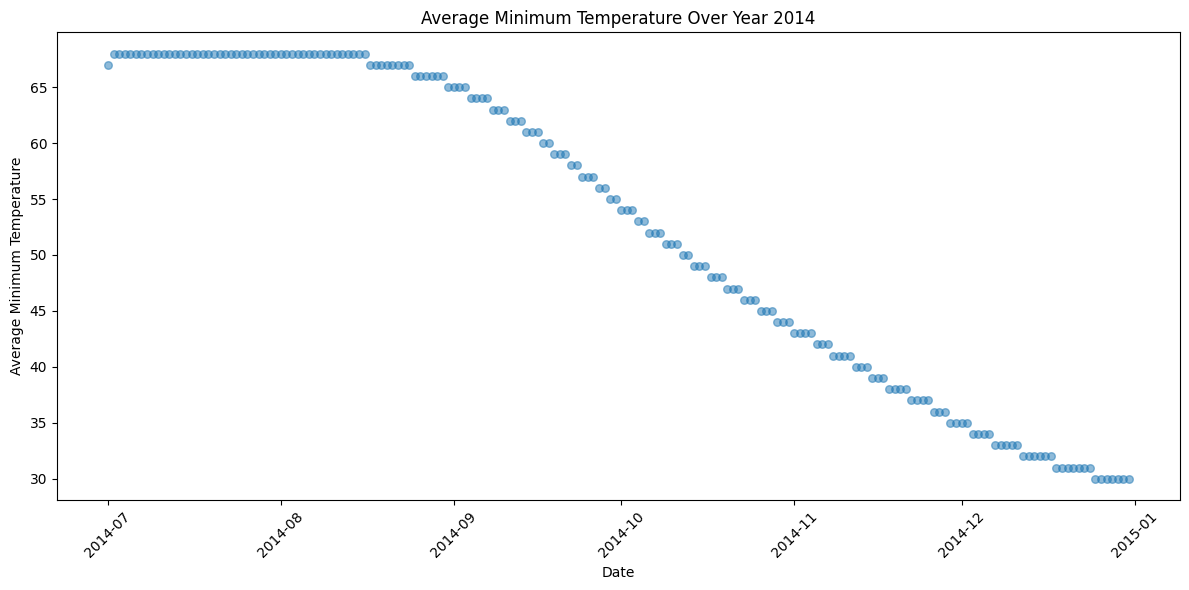

In [ ]:
# Filter data for the year 2014
df_2014 = df[df['date'].str.startswith('2014')].copy()

# Convert date column to datetime type
df_2014['date'] = pd.to_datetime(df_2014['date'])

# Create a scatter plot of average_min_temp over the year 2014
plt.figure(figsize=(12, 6))
plt.scatter(df_2014['date'], df_2014['average_min_temp'], s=30, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature Over Year 2014')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


A **scatter plot** is a good choice for visualizing the average_min_temp over the year 2014 since it has a large number of data points and the individual data points can be seen more clearly.

**Q3. Are there any outliers in actual_max_temp use an appropriate plot to show?**

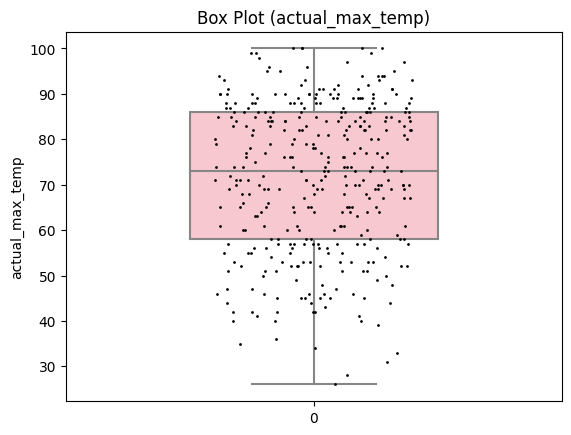

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the box plot
sns.boxplot(data=df['actual_max_temp'], ax=ax, color='pink', whis=[0, 100], width=0.5)

# Plot the individual data points
sns.stripplot(data=df['actual_max_temp'], ax=ax, color='black', jitter=0.2, size=2)

# Set the title
plt.title('Box Plot (actual_max_temp)')

# Display the plot
plt.show()


A **box plot** can be used to visualize the distribution and identify outliers in the actual_max_temp variable.


**Q4. Which month has highest average_precipitation over the year 2014 and 2015 , use a suitable filtering of data to find?**

In [ ]:
# Filter data for the years 2014 and 2015
df_2014_2015 = df[df['date'].str.startswith(('2014', '2015'))]

# Extract month from date and calculate average precipitation for each month
df_2014_2015['month'] = pd.to_datetime(df_2014_2015['date']).dt.month
avg_precipitation_by_month = df_2014_2015.groupby('month')['average_precipitation'].mean()

# Find the month with the highest average precipitation
month_with_highest_precipitation = avg_precipitation_by_month.idxmax()

print("Month with the Highest Average Precipitation:")
print(month_with_highest_precipitation)


Month with the Highest Average Precipitation:
8


The month with the highest average precipitation over the years 2014 and 2015 is **August** (month 8).

**Q5. Print the first 10 rows, then remove the row containing data of ‘2014-7-3’, save this row in a variable of type series (data structure). Print the first 10 rows after removal of row.**

In [ ]:
# Remove row containing '2014-7-3' and save it in a variable
row_to_remove = df[df['date'] == '2014-07-03']
df_filtered = df[df['date'] != '2014-07-03']

# View the first 10 rows after removing the row
print("First 10 rows after removal of '2014-7-3':")
print(df_filtered.head(10))


First 10 rows after removal of '2014-7-3':
        date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0   2014-7-1                81               70               91   
1   2014-7-2                85               74               95   
2   2014-7-3                82               71               93   
3   2014-7-4                75               64               86   
4   2014-7-5                72               60               84   
5   2014-7-6                74               61               87   
6   2014-7-7                79               67               91   
7   2014-7-8                83               72               94   
8   2014-7-9                80               71               89   
9  2014-7-10                78               71               85   

   average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                67                89               56              104   
1                68                89               56    

After removing the row containing data for '2014-7-3' from the dataset, we can observe that the dataset now consists of the first 10 rows after the removal.

# **TASK 2** - Regression



The data provided represents weather history data for a particular area, the problem can be approached as a regression analysis.

Step 1: Data Preprocessing

First, we need to import the necessary libraries and load the dataset.

In [ ]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv'
df = pd.read_csv(url)



Step 2: Feature Engineering

We can perform feature engineering by manipulating and transforming the existing features or creating new ones based on domain knowledge. Here, we will extract the year, month, and day from the "date" column.

In [ ]:
# Extract year, month, and day from the date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


Step 3: Split dataset into train-test

Next, we split the dataset into a training set and a testing set using an 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = ['year', 'month', 'day', 'actual_mean_temp', 'actual_precipitation']
target = 'actual_max_temp'

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


Step 4: Model Selection

Now, we need to select a model for training. We will use a decision tree regressor.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create the model
model = DecisionTreeRegressor(random_state=42)


Step 5: Model Training

We can train the model using the training dataset.

In [ ]:
# Train the model
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

Step 6: Model Evaluation

Evaluate the model's performance using appropriate evaluation metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 12.931506849315069
R-squared: 0.9572125044394386


Step 7: Fine-tune the Model

We can fine-tune the model by adjusting its hyperparameters. Here, we can tune the maximum depth of the decision tree.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'max_depth': [3, 5, 7, 9]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


Step 8: Make Predictions

Finally, we can use the trained model to make predictions on new data.

In [ ]:
# Make predictions using the best model
y_pred = best_model.predict(X_test)


Step 9: Model Performance Summary

Summarize the model's performance using evaluation metrics.

In [ ]:
# Calculate evaluation metrics for the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
modelscore=model.score(X_train, y_train)

# Print the summary of model performance
print("Best Model's Performance Summary:")
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Model Score:",modelscore)


Best Model's Performance Summary:
Mean Squared Error: 10.765276932252192
R2 score: 0.9643800800390596
Model Score: 1.0
